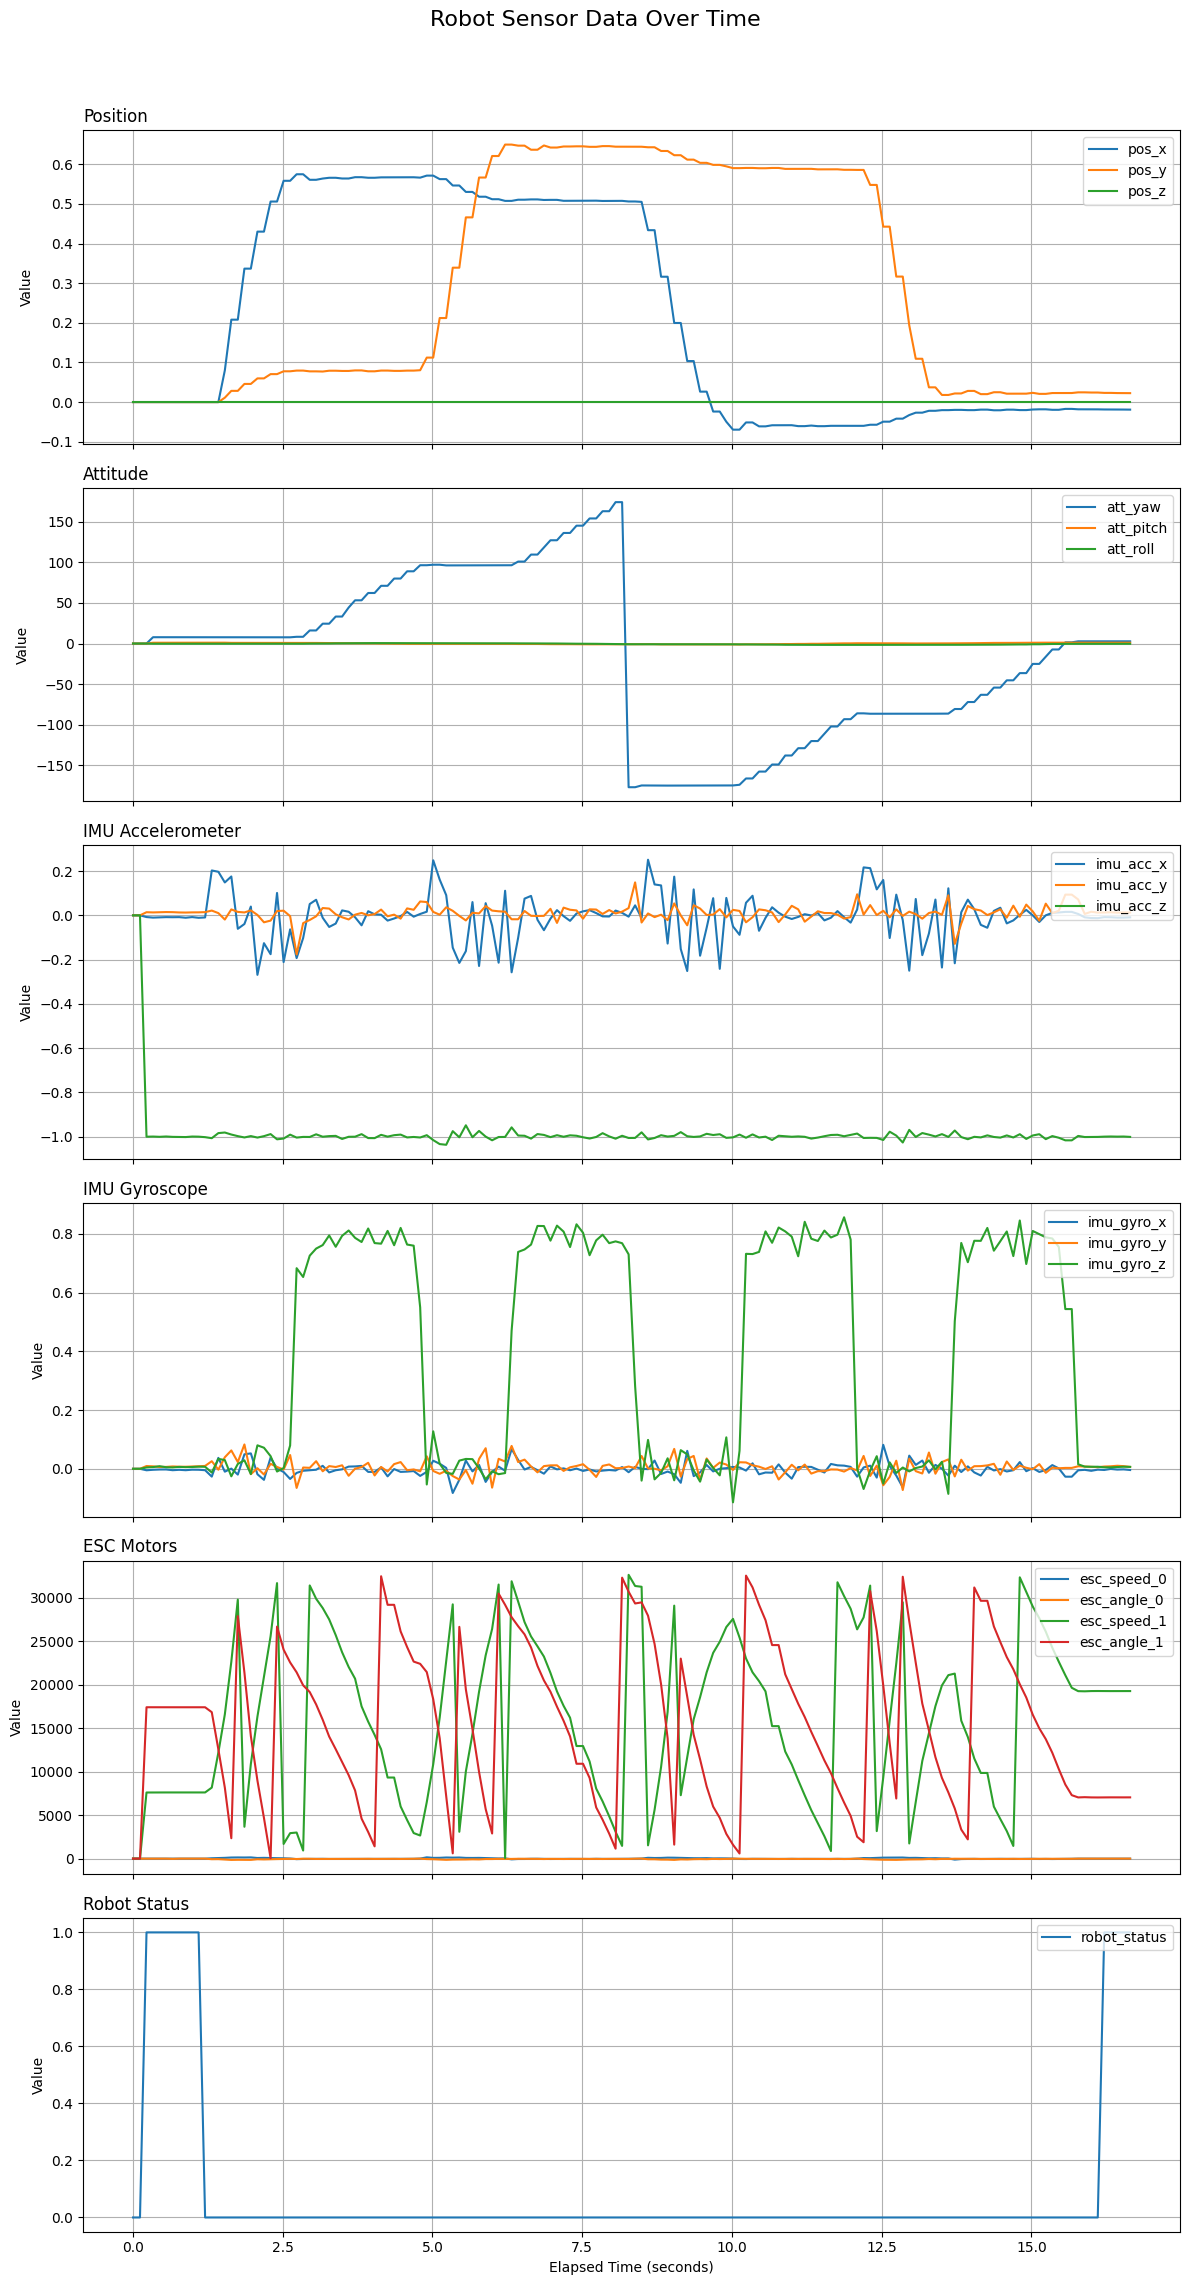

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ตรวจสอบว่ามีไฟล์ CSV อยู่จริงหรือไม่
csv_file_path = "robot_full_data.csv"
df = pd.read_csv(csv_file_path)

# 2. แปลงคอลัมน์ timestamp ให้เป็น datetime object
# ตรวจสอบก่อนว่าคอลัมน์ 'timestamp' มีอยู่
if 'timestamp' not in df.columns:
    print("Error: 'timestamp' column not found in the CSV file.")
    exit()

df['timestamp'] = pd.to_datetime(df['timestamp'])

# ใช้เวลาเริ่มต้นของการบันทึกเป็นจุดอ้างอิงสำหรับ 'time_step' (Elapsed Time)
# หรือใช้ index ของ DataFrame เป็น 'loop iterations' ก็ได้
# ในที่นี้จะสร้าง 'elapsed_time_seconds' เพื่อให้สอดคล้องกับ 'time step' ในโจทย์
df['elapsed_time_seconds'] = (df['timestamp'] - df['timestamp'].iloc[0]).dt.total_seconds()

# เลือกคอลัมน์ข้อมูลเซ็นเซอร์ที่เราต้องการ plot
# จัดกลุ่มตามประเภทเพื่อการแสดงผลที่ดีขึ้น
position_cols = ['pos_x', 'pos_y', 'pos_z']
attitude_cols = ['att_yaw', 'att_pitch', 'att_roll']
imu_acc_cols = ['imu_acc_x', 'imu_acc_y', 'imu_acc_z']
imu_gyro_cols = ['imu_gyro_x', 'imu_gyro_y', 'imu_gyro_z']
esc_cols = ['esc_speed_0', 'esc_angle_0', 'esc_speed_1', 'esc_angle_1']
robot_status_col = ['robot_status']

all_sensor_groups = {
    "Position": position_cols,
    "Attitude": attitude_cols,
    "IMU Accelerometer": imu_acc_cols,
    "IMU Gyroscope": imu_gyro_cols,
    "ESC Motors": esc_cols,
    "Robot Status": robot_status_col
}

# 3. สร้าง Plot ใน Subplot แยกกัน
fig, axes = plt.subplots(len(all_sensor_groups), 1, figsize=(12, 4 * len(all_sensor_groups)), sharex=True)
# ถ้ามีแค่ 1 กลุ่ม, axes จะไม่ใช่ array, ต้องจัดการกรณีนี้
if len(all_sensor_groups) == 1:
    axes = [axes]

# กำหนดหัวข้อหลักของกราฟ
fig.suptitle('Robot Sensor Data Over Time', fontsize=16)

# วนลูปเพื่อ plot ข้อมูลแต่ละกลุ่มเซ็นเซอร์
for i, (group_name, cols) in enumerate(all_sensor_groups.items()):
    ax = axes[i]
    for col in cols:
        if col in df.columns: # ตรวจสอบว่าคอลัมน์มีอยู่จริงใน DataFrame
            ax.plot(df['elapsed_time_seconds'], df[col], label=col)
        else:
            print(f"Warning: Column '{col}' not found in DataFrame. Skipping plot for this column.")
    
    ax.set_title(group_name, loc='left')
    ax.set_ylabel('Value')
    ax.legend(loc='upper right')
    ax.grid(True)

# ตั้งค่าแกน X สำหรับกราฟทั้งหมด
axes[-1].set_xlabel('Elapsed Time (seconds)')

# ปรับ layout ให้เหมาะสมและแสดงกราฟ
plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # ปรับ rect เพื่อให้มีพื้นที่สำหรับ suptitle
plt.show()

print("Plotting complete. If no plot appeared, check for errors in the console.")